In [ ]:
!pip install gdown

In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1XXgJNTEl4p4APOAYsDXEFEk9XX-8lg07"
gdown.download(url, "accidents.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1XXgJNTEl4p4APOAYsDXEFEk9XX-8lg07
From (redirected): https://drive.google.com/uc?id=1XXgJNTEl4p4APOAYsDXEFEk9XX-8lg07&confirm=t&uuid=e3d4c7cd-4b62-401f-b64c-34eb5239603d
To: /content/accidents.csv
100%|██████████| 3.06G/3.06G [00:47<00:00, 64.6MB/s]


'accidents.csv'

In [ ]:
import pandas as pd

chunks = pd.read_csv("/content/accidents.csv", chunksize=200000)
us_accident_df = pd.concat(chunks)

In [ ]:
us_accident_df['Start_Lat']=pd.to_numeric(us_accident_df['Start_Lat'], errors='coerce')
us_accident_df['Start_Lng']=pd.to_numeric(us_accident_df['Start_Lng'], errors='coerce')

In [ ]:
geo_cor_df=us_accident_df.dropna(subset=['Start_Lat','Start_Lng'])
geo_cor_df.shape

(7728394, 46)

/tmp/ipython-input-1153858685.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


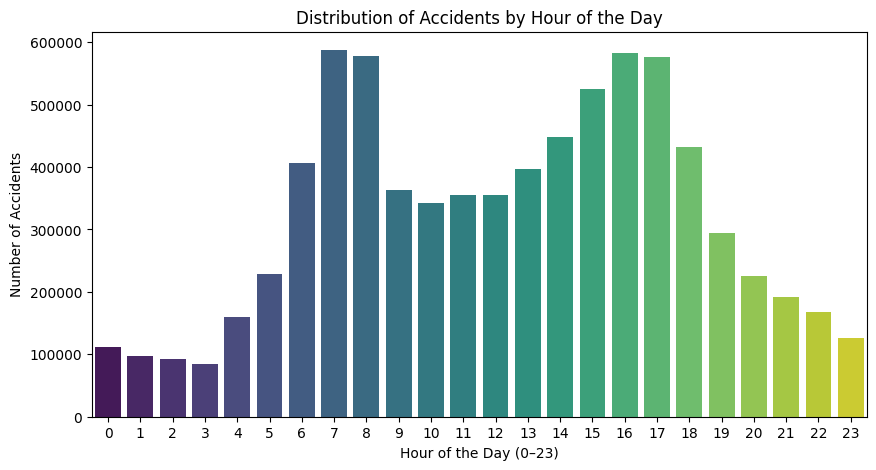

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
us_accident_df['Start_Time'] = pd.to_datetime(us_accident_df['Start_Time'],format='mixed', errors='coerce')
us_accident_df['Hour'] = us_accident_df['Start_Time'].dt.hour
hourly_counts = us_accident_df['Hour'].value_counts().sort_index()


plt.figure(figsize=(10, 5))

sns.countplot(
    x='Hour',
    data=us_accident_df, palette='viridis'
)

plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Number of Accidents')
plt.show()






**Q2**. How does accident severity distribute across different States?

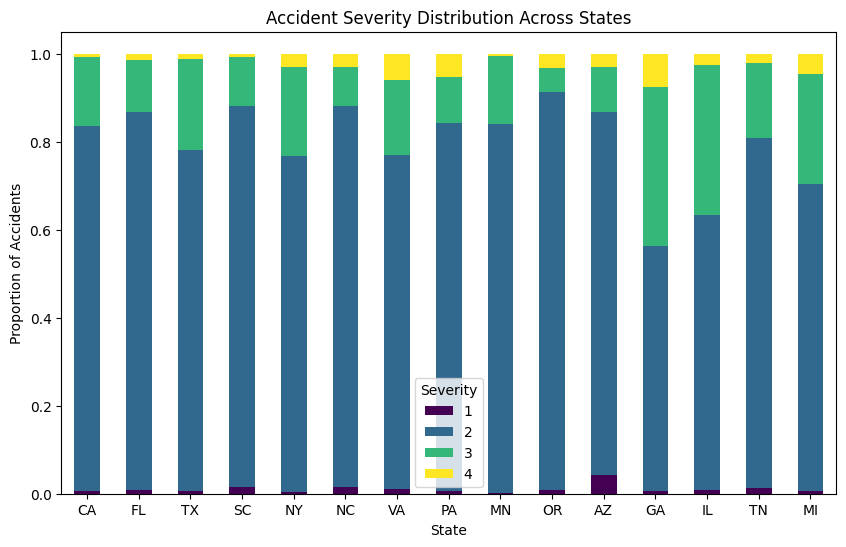

In [ ]:
#count of each severity in each state
state_severity_counts = (us_accident_df.groupby(['State', 'Severity']).size().unstack(fill_value=0))
state_severity_counts.head()

# converting counts to proportion
state_severity_proportions = state_severity_counts.div(state_severity_counts.sum(axis=1),axis=0)

# focusing on top 15 states
top_states = us_accident_df['State'].value_counts().head(15).index

top_state_severity = state_severity_proportions.loc[top_states]
top_state_severity
# visualizing accidednt severity distribution across each state using bar plot
ax = top_state_severity.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Accident Severity Distribution Across States')
plt.xlabel('State')
plt.ylabel('Proportion of Accidents')
plt.xticks(rotation=0)
plt.show()

Q3. What weather conditions are associated with the highest accident severity?

In [ ]:
# drop null values
weather_df = us_accident_df[['Weather_Condition', 'Severity']].dropna()

#compute each severity count for all weather conditions
weather_severity_counts = (
    weather_df
    .groupby(['Weather_Condition', 'Severity'])
    .size()
    .unstack(fill_value=0)
)
weather_severity_counts.head()


Severity,1,2,3,4
Weather_Condition,,,,
Blowing Dust,1,171,17,0
Blowing Dust / Windy,8,231,19,8
Blowing Sand,0,1,1,0
Blowing Snow,0,567,134,39
Blowing Snow / Windy,0,884,17,24


/tmp/ipython-input-3873498668.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


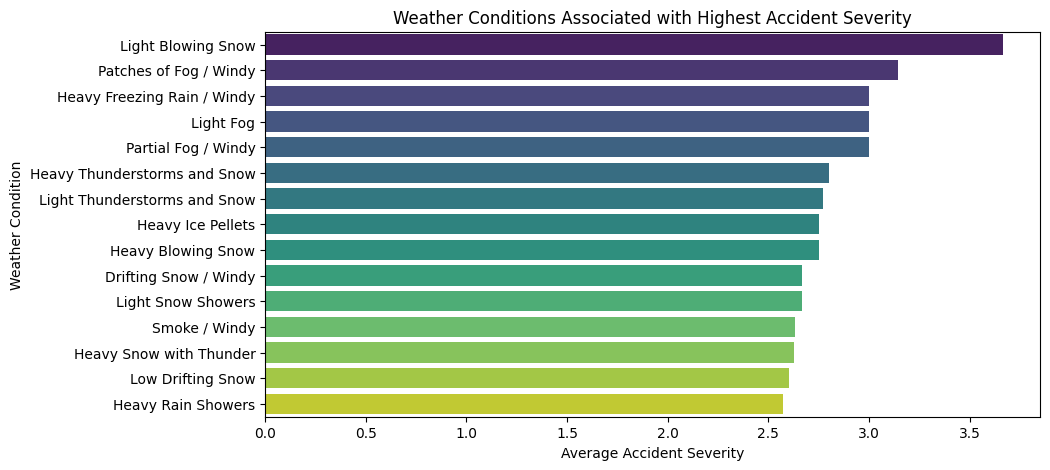

In [ ]:
# compute average of severity for each weather condition
weather_avg_severity = (weather_df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False))
# focus on top 15 weather condition
top_weather = weather_avg_severity.head(15)
top_weather

# visualize using barplot
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_weather.values,
    y=top_weather.index,
    palette='viridis'
)

plt.xlabel('Average Accident Severity')
plt.ylabel('Weather Condition')
plt.title('Weather Conditions Associated with Highest Accident Severity')
plt.show()

Q4. How many accidents occur during day vs night? (Sunrise_Sunset column)

In [ ]:
# count of accidents during day and night
us_accident_df['Sunrise_Sunset'].value_counts()

,count
Sunrise_Sunset,
Day,5334553
Night,2370595


/tmp/ipython-input-2043201312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


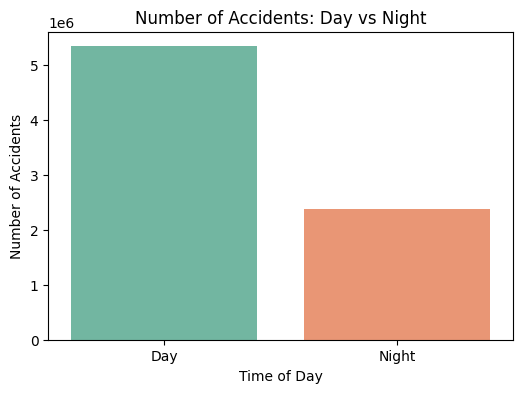

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(
    x='Sunrise_Sunset',
    data=us_accident_df,
    order=['Day', 'Night'],
    palette='Set2'
)

plt.title('Number of Accidents: Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


Q5. Distribution of accidents on different days of the week

/tmp/ipython-input-1897271171.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


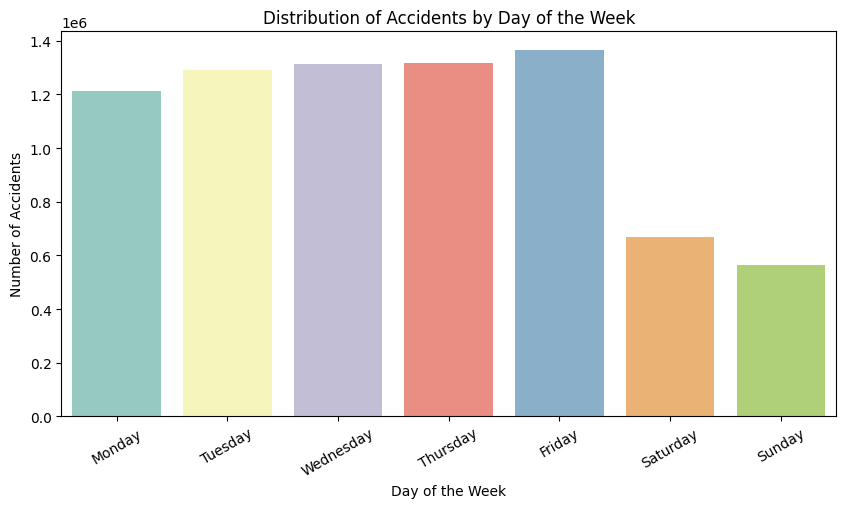

In [ ]:
# convert 'Start_Time' type string to datetime
us_accident_df['Start_Time']=pd.to_datetime(us_accident_df['Start_Time'],format='mixed',errors='coerce')
# extract only day name from 'Start_Time'
us_accident_df['Day_of_Week'] = us_accident_df['Start_Time'].dt.day_name()

#count no.of accidents per day
day_of_week_counts = us_accident_df['Day_of_Week'].value_counts()

day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
# visualize using counter plot
plt.figure(figsize=(10,5))
sns.countplot(
    x='Day_of_Week',
    data=us_accident_df,
    order=day_order,
    palette='Set3'
)

plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30)
plt.show()


**Q6**. Are certain traffic features (e.g., Traffic Signal, Stop, Crossing) associated with accident counts?

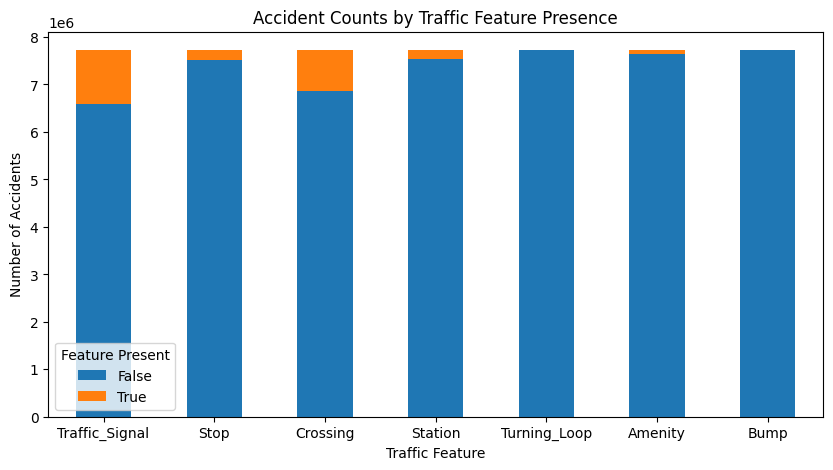

In [ ]:
 # select traffic features
 traffic_features = ['Traffic_Signal', 'Stop', 'Crossing', 'Station', 'Turning_Loop', 'Amenity', 'Bump']

feature_counts = {}
#count accidents for each feature
for feature in traffic_features:feature_counts[feature] = us_accident_df[feature].value_counts()

feature_counts_df = pd.DataFrame(feature_counts).fillna(0)
feature_counts_df

feature_counts_df.T.plot(
    kind='bar',
    figsize=(10,5),
    stacked=True
)


plt.title('Accident Counts by Traffic Feature Presence')
plt.xlabel('Traffic Feature')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Feature Present')
plt.show()
